In [3]:
!pip install tensorflow

  Using cached tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp313-cp313-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Usin

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-unpack-hse_ae4y\\tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl'
Consider using the `--user` option or check the permissions.



   ------------------ --------------------- 155.7/332.0 MB 2.7 MB/s eta 0:01:07
   ------------------ --------------------- 156.5/332.0 MB 2.7 MB/s eta 0:01:06
   ------------------- -------------------- 157.8/332.0 MB 2.7 MB/s eta 0:01:05
   ------------------- -------------------- 159.4/332.0 MB 2.7 MB/s eta 0:01:04
   ------------------- -------------------- 160.4/332.0 MB 2.7 MB/s eta 0:01:03
   ------------------- -------------------- 161.2/332.0 MB 2.8 MB/s eta 0:01:02
   ------------------- -------------------- 161.5/332.0 MB 2.8 MB/s eta 0:01:02
   ------------------- -------------------- 162.8/332.0 MB 2.8 MB/s eta 0:01:01
   ------------------- -------------------- 164.1/332.0 MB 2.8 MB/s eta 0:01:00
   ------------------- -------------------- 165.4/332.0 MB 2.8 MB/s eta 0:00:59
   ------------------- -------------------- 165.9/332.0 MB 2.8 MB/s eta 0:00:59
   -------------------- ------------------- 166.7/332.0 MB 2.8 MB/s eta 0:01:00
   -------------------- ----------------

In [10]:
# ============================
# Step 1: Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [11]:
# ============================
# Step 2: Load & Inspect Data
# ============================
df = pd.read_csv("RELIANCE.NS.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6996 non-null   object 
 1   Open          6996 non-null   float64
 2   High          6996 non-null   float64
 3   Low           6996 non-null   float64
 4   Close         6996 non-null   float64
 5   Volume        6996 non-null   int64  
 6   Dividends     6996 non-null   float64
 7   Stock Splits  6996 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 437.4+ KB
None
                        Date       Open       High        Low      Close  \
0  1996-01-01 00:00:00+05:30  10.403050  10.458871  10.334541  10.441110   
1  1996-01-02 00:00:00+05:30  10.415734  10.466481  10.283793  10.359913   
2  1996-01-03 00:00:00+05:30  10.529913  11.009468  10.415733  10.438569   
3  1996-01-04 00:00:00+05:30  10.339614  10.372600  10.202599  10.342152   
4  1996-01-05 0

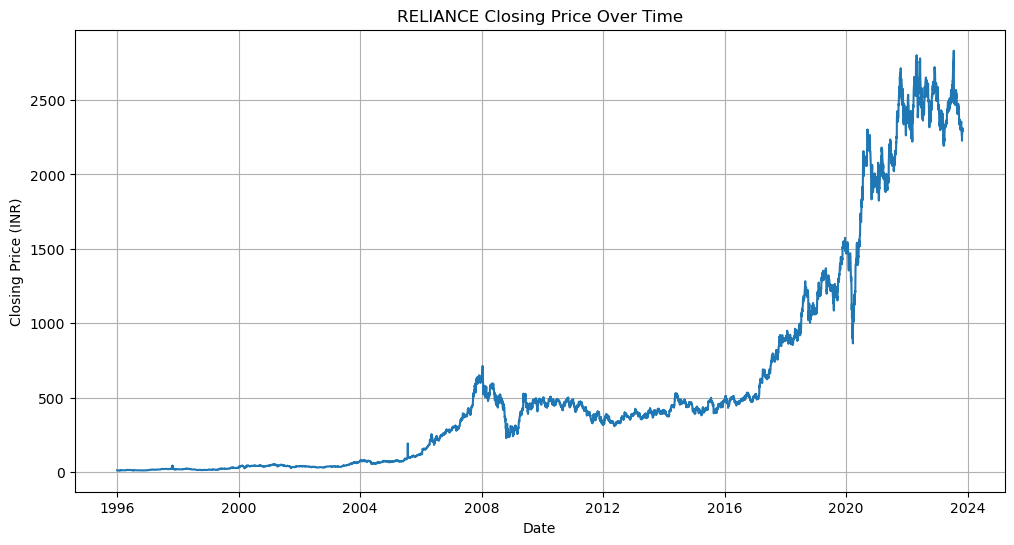

Shape of X: (6936, 60, 1)
Shape of y: (6936,)


In [12]:
# ============================
# Step 3: Data Processing
# ============================
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Visualize Close price trend
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('RELIANCE Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.show()

# Use Close prices only
close_data = df[['Close']].values

# Scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_data)

# Create sequences (60-day lookback)
time_step = 60
X_list, y_list = [], []

for i in range(time_step, len(scaled_close)):
    X_list.append(scaled_close[i-time_step:i, 0])
    y_list.append(scaled_close[i, 0])

X = np.array(X_list)
y = np.array(y_list)

# Reshape for LSTM [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)




In [13]:
# ============================
# Step 4: Train-Test Split
# ============================
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (5548, 60, 1) (5548,)
Test shape: (1388, 60, 1) (1388,)


In [14]:
# ============================
# Step 5: Build LSTM Model
# ============================
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# ============================
# Step 6: Train Model
# ============================
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 72s 298ms/step - loss: 3.4119e-04 - val_loss: 0.0013
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - loss: 3.0858e-05 - val_loss: 0.0011
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 71s 177ms/step - loss: 2.7475e-05 - val_loss: 5.8959e-04
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - loss: 2.7438e-05 - val_loss: 5.6695e-04
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 2.4143e-05 - val_loss: 5.1142e-04
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 43s 191ms/step - loss: 2.3599e-05 - val_loss: 4.5015e-04
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 44s 207ms/step - loss: 2.3173e-05 - val_loss: 4.5644e-04
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - loss: 2.1800e-05 - val_loss: 5.6766e-04
Epoch 9/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - loss: 1.8416e-05 - val_loss: 5.5462e-04
Epoch 10/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - loss: 1.8231e-05 - val_loss: 3.4726e-04
Epoch 11/20
174/174 ━━━━━━━━━━━━━━━━━

In [16]:
# ============================
# Step 7: Model Evaluation
# ============================
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to original price scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
mae = mean_absolute_error(y_test_actual, test_predict)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

174/174 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step
RMSE: 40.30
MAE: 29.89


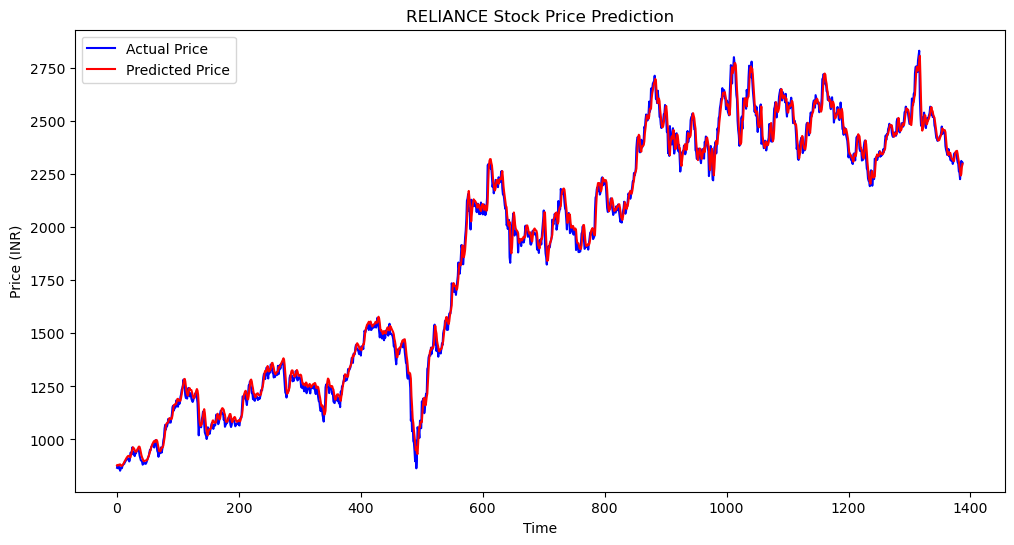

In [17]:
# ============================
# Step 8: Visualization of Predictions
# ============================
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(test_predict, color='red', label='Predicted Price')
plt.title('RELIANCE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()